In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Plot Grafik Berdasarkan Teori

In [21]:
t = np.arange(0, 50, 0.5)
vx = -15*np.sin(t)
vy = 15*np.cos(t)

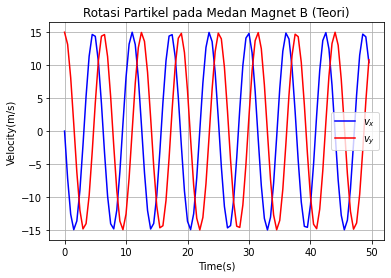

In [22]:
plt.figure()
plt.grid()
plt.plot(t,vx,"b",label = "$v_x$")
plt.plot(t,vy,"r",label = "$v_y$")
plt.title("Rotasi Partikel pada Medan Magnet B (Teori)")
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.legend(loc = "best")
plt.show()

# 2. Plot Grafik Berdasarkan Metode Numerik

In [26]:
def rk(F,x,y,t,h):
    k0 = h*F(t,x,y)
    k1 = h*(t+h/2.0, x+k0/2.0, y)
    k2 = h*F(t+h/2.0, x+k1/2.0, y)
    k3 = h*F(t+h,x+k2,y)
    return(k0+2.0*k1+2.0*k2+k3)/6.0

def vx_terkopel(vx,vy,t,q=1.0,Bz=1.0,m=1.0):
    return -q*Bz/m*vy

def vy_terkopel(vx,vy,t,q=1.0,Bz=1.0,m=1.0):
    return -q*Bz/m*vx

In [27]:
vx0 = 0.0
vy0 = 15.0
t0 = 0.0
t_stop = 50.0
h = 0.005
vxs = [vx0]
vys = [vy0]
ts = [t0]

In [28]:
while ts[-1] < t_stop:
    h = min(h, t_stop - ts[-1])
    vx = vxs[-1]+rk(vx_terkopel,ts[-1],vxs[-1],vys[-1],h)
    vy = vys[-1]+rk(vy_terkopel,ts[-1],vys[-1],vxs[-1],h)
    t = ts[-1]+h
    ts.append(t)
    vxs.append(vx)
    vys.append(vy)

TypeError: can't multiply sequence by non-int of type 'float'

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

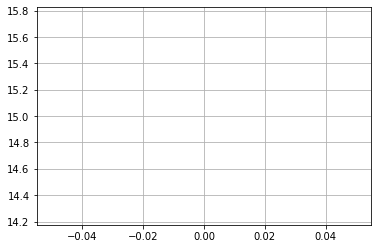

In [29]:
plt.figure()
plt.grid()
plt.plot(ts,vys,"b",label = "$v_x$")
plt.plot(t,vxs,"r",label = "$v_y$")
plt.title("Rotasi Partikel pada Medan Magnet B (Numerik Runge-Kutta)")
plt.xlabel("Time(s)")
plt.ylabel("Velocity(m/s)")
plt.legend(loc = "best")
plt.show()